Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/praktikumML/tugas12/Breast_Cancer.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
df.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


In [6]:
df.duplicated().sum()

np.int64(1)

Encoding

In [7]:
df['Status'] = df['Status'].map({'Alive': 0, 'Dead': 1})

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,...,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive
0,68,4,24,1,60,0,False,True,True,False,...,False,True,False,False,False,False,True,True,True,True
1,50,35,14,5,62,0,False,True,True,False,...,False,False,False,False,False,True,False,True,True,True
2,58,63,14,7,75,0,False,True,False,False,...,True,False,False,False,False,True,False,True,True,True
3,58,18,2,1,84,0,False,True,True,False,...,False,True,False,False,False,False,True,True,True,True
4,47,41,3,1,50,0,False,True,True,False,...,False,True,False,False,False,False,True,True,True,True


Select Fitur

In [9]:
X = df_encoded.drop('Status', axis=1)
y = df_encoded['Status']

Train–Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Standarisasi Data

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [12]:
svm_no_pca = SVC(kernel='rbf', gamma='scale')
svm_no_pca.fit(X_train_scaled, y_train)

y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi SVM tanpa PCA:", acc_no_pca)
print(classification_report(y_test, y_pred_no_pca))

Akurasi SVM tanpa PCA: 0.8881987577639752
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       682
           1       0.84      0.33      0.48       123

    accuracy                           0.89       805
   macro avg       0.86      0.66      0.71       805
weighted avg       0.88      0.89      0.87       805



MODEL BASELINE (SVM TANPA PCA)

In [13]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

Explained Variance Ratio: [0.12808895 0.09113295]
Total Variance: 0.21922190095434246


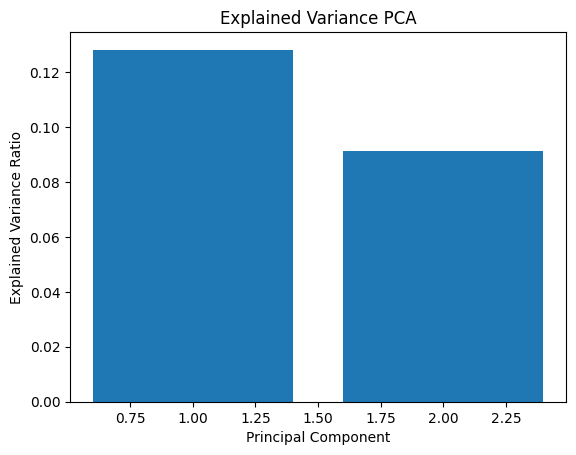

In [14]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance:", pca.explained_variance_ratio_.sum())

plt.bar(range(1, 3), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance PCA")
plt.show()

SVM DENGAN PCA

In [15]:
svm_pca = SVC(kernel='rbf', gamma='scale')
svm_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi SVM dengan PCA:", acc_pca)
print(classification_report(y_test, y_pred_pca))

Akurasi SVM dengan PCA: 0.8583850931677018
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       682
           1       0.85      0.09      0.16       123

    accuracy                           0.86       805
   macro avg       0.85      0.54      0.54       805
weighted avg       0.86      0.86      0.81       805



Visualisasi PCA 2D

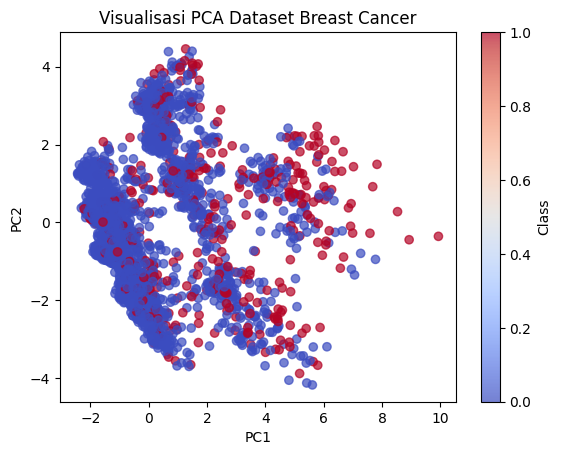

In [16]:
plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train,
    cmap='coolwarm',
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi PCA Dataset Breast Cancer")
plt.colorbar(label="Class")
plt.show()

Perbandingan Akhir

In [17]:
print("Akurasi tanpa PCA :", acc_no_pca)
print("Akurasi dengan PCA:", acc_pca)

Akurasi tanpa PCA : 0.8881987577639752
Akurasi dengan PCA: 0.8583850931677018
